In [77]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [78]:
'''
parameters in tree.DecisionTreeClassifier()

*criterion = 
'gini'- for overfitting, default, large numer of features and noise
'entropy'- for underfitting, more sensitive to noise and easily overfit

*To avoid overfitting

random_state = int - random seed

splitter = 'random'

*To prune the tree 

max_depth >= 3 - large number of features and small size of samples
min_sample_leaf >=5 or some fraction, 0.15 for example.
min_sample_split
max_feature - use PCA or ICA to reduce the feartures before
min_impurity_decrease - 'entropy gain'

*for skewed samples, for example, benign vs malignant tumors
 class_weight: 'balanced', dict{class_lable:weight}
 min_weight_fraction_leaf 
 

'''


#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(x_train,y_train)
#clf_score = clf.score(x_test,y_test)

"\nparameters in tree.DecisionTreeClassifier()\n\ncriterion = \n'gini'- default, large numer of features and noise\n'entropy'- more sensitive to noise and easily overfit\n\nTo avoid overfitting\n\nrandom_state = int - random seed\n\nsplitter = 'random'\n\nTo prune the tree \n\nmax_depth >= 3 - large number of features and small size of samples\nmin_sample_leaf >=5 or some fraction, 0.15 for example.\nmin_sample_split\nmax_feature - use PCA or ICA to reduce the feartures before\nmin_impurity_decrease - 'entropy gain'\n\n"

In [79]:
wine = load_wine()

In [80]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [81]:
wine.data.shape

(178, 13)

In [82]:
wineTable=pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)],axis=1)

In [92]:
columns = wine.feature_names + ['class']
columns

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'class']

In [93]:
wineTable.columns = columns

In [94]:
wineTable

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [95]:
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [96]:
xtrain.shape

(124, 13)

In [138]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=0
                                  ,splitter='best'
                                  ,max_depth=3)
clf = clf.fit(xtrain,ytrain)
score = clf.score(xtest,ytest)
score

0.9074074074074074

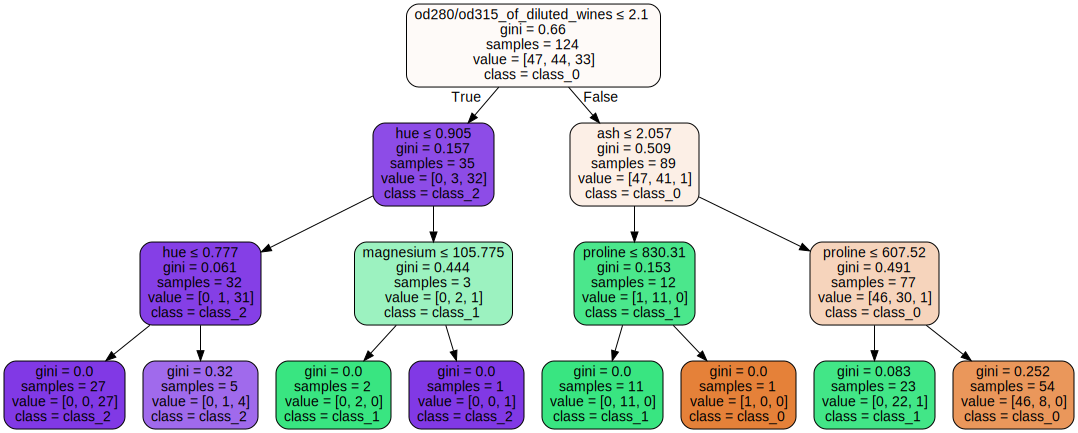

In [128]:
dot_data = tree.export_graphviz(clf 
                                , feature_names=wine.feature_names 
                                , class_names=wine.target_names
                                , filled=True
                                , rounded=True
                                , special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [101]:
# important features
clf.feature_importances_

array([0.        , 0.        , 0.03083649, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01667798, 0.10148481,
       0.04572747, 0.47268531, 0.33258794])

In [68]:
#weights for each feature
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.0195476979372231),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.4513888239205808),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.20616039874773492),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.3229030793944611)]

In [139]:
# learning curve
# parameters:  max_depth

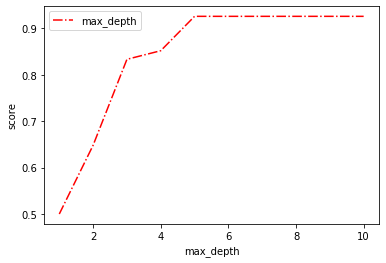

In [142]:
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion='entropy'
                                     ,random_state=30
                                     ,splitter='random')
    clf.fit(xtrain,ytrain)
    score = clf.score(xtest,ytest)
    test.append(score)
plt.plot(range(1,11),test,color='red',linestyle='-.',label='max_depth')
plt.legend() 
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [ ]:
'''
attributes to look up after a model is trained successfully:

.feature_importance_()

methods
.fit(xtrain, ytrain) #only take in a 2-d array
.score(xtest) #only take in a 2-d array
.predict(xtest ) #only take in a 2-d array


'''